In [31]:
theta = (np.random.rand(3) * 0.02) - 0.01
alpha = 0.05

theta [ 0.0051051   0.00171742 -0.00983839]
trained theta [  40.33221866  -75.56514985  105.55745003]
1.0 1.25326918123e-50
1.0 0.98855100554
0.0 6.54558120016e-181


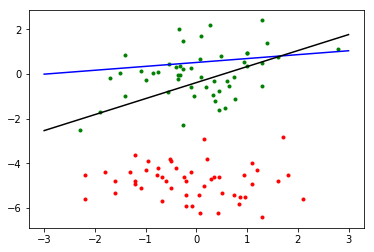

In [57]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import pi

dtypes = {'names': ('x', 'y', 'class'), 'formats': ('f16', 'f16', 'f16')}
data = np.loadtxt("data.txt", delimiter=" ", dtype=dtypes)

def plot(data, cls, color):
    filtered = np.array([(x, y, c) for x, y, c in data if c == cls], dtype=dtypes)
    plt.scatter(filtered['x'], filtered['y'], c=color, marker='.')
    
def hyp(theta, x):
    return logistic(theta.dot(x))

def plot_fn(fn, xs, color='black'):
    ys = []
    for x in xs:
        ys.append(fn(x))
    plt.plot(xs, ys, color)
    
def plot_hyp(theta, color):
    plot_fn(lambda x: (theta[0] + theta[1]*x)*(-1/theta[2]), range(-3, 4), color)

def logistic(z):
    return 1/(1+np.exp(-z))


print("theta", theta)

plot_hyp(theta, 'blue')
iterations = 100
trained_theta = np.copy(theta)
for iteration in range(iterations):
    for x in data:
        new_theta = np.copy(trained_theta)
        for j in range(len(theta)):
            new_theta[j] = trained_theta[j] + (alpha * (x['class'] - hyp(trained_theta, (1, x['x'], x['y']))) * x[j])
        trained_theta = new_theta

plot(data, 1, 'green')
plot(data, 0, 'red')
plot_hyp(trained_theta, 'black')
print("trained theta", trained_theta)
print(data[0]['class'], hyp(trained_theta, (1, data[0]['x'], data[0]['y'])))
print(data[5]['class'], hyp(trained_theta, (1, data[5]['x'], data[5]['y'])))
print(data[55]['class'], hyp(trained_theta, (1, data[55]['x'], data[55]['y'])))